<br>
<CENTER><font size="+5" color='#00000'><b>Nettoyage et préparation des données</b></font></CENTER>

In [67]:
import csv
import pandas as pd
import numpy as np
from numpy.random import permutation
from MyModule import Processing

import warnings
warnings.filterwarnings('ignore')

i. Chargement des données à l'aide du module ``pandas``
--

In [68]:
d = pd.read_csv('don.csv',encoding='latin-1',delimiter='\"',sep=';')

In [69]:
d.head()

,age;prof;dep.cons;scz.cons;grav.cons;n.enfant;rs;ed;dr
0,31;autre;0;0;1;2;2;1;1
1,49;NA;0;0;2;7;2;2;1
2,50@;prof.intermediaire;0;0;2;2;2;3;2
3,47;ouvrier;0;0;1;0;2;2;2
4,23;sans emploi;1;0;2;1;2;2;2


**Remarque** : <br>
Les données charger avec pandas n'ont pas un format exploitable. Cela peut etre expliqué par un mauvais formatage des données.
dans la suit de ce notebook nous essayerons à travers d'autre approche de fournir un format exploitable de ce jeu de donées en le structurant et en le nettoyant.

ii. Chargement des données à l'aide du module `CSV`
--

In [70]:
with open('don.csv') as mon_fichier:
    mon_fichier_reader = csv.reader(mon_fichier, delimiter=';', quotechar='"')
    donnees = [x for x in mon_fichier_reader]  
# affichage des 5 premières lignes du jeux de données.
donnees[:5]

[['age;prof;dep.cons;scz.cons;grav.cons;n.enfant;rs;ed;dr'],
 ['31;autre;0;0;1;2;2;1;1'],
 ['49;NA;0;0;2;7;2;2;1'],
 ['50@;prof.intermediaire;0;0;2;2;2;3;2'],
 ['47;ouvrier;0;0;1;0;2;2;2']]

les données ne sont certes toujours pas dans un format exploitable cependant ils sont dans des objets (`list()`) qu'on sais plus ou moins bien manipuler

I. Etape 1
--
Nous essayerons de séparer les éléments du jeu de données en colonne et observation contenu de la colonne à l'aide de la methode `split()`

In [71]:
frame = []
for c in donnees:
    frame.append([j.split(';') for j in c])
# chargement des données splitter dans un object de type ndarray    
df = np.array(frame)

# afffichage des 5 premières lignes du jeux de données
df[:5]

array([[['age', 'prof', 'dep.cons', 'scz.cons', 'grav.cons', 'n.enfant',
         'rs', 'ed', 'dr']],

       [['31', 'autre', '0', '0', '1', '2', '2', '1', '1']],

       [['49', 'NA', '0', '0', '2', '7', '2', '2', '1']],

       [['50@', 'prof.intermediaire', '0', '0', '2', '2', '2', '3', '2']],

       [['47', 'ouvrier', '0', '0', '1', '0', '2', '2', '2']]],
      dtype='<U18')

II. Etape 2
--
**Organisation des données**

1. Traitement du nom des variables

In [72]:
name_var = [c for c in df[0][0]]
name_var

['age',
 'prof',
 'dep.cons',
 'scz.cons',
 'grav.cons',
 'n.enfant',
 'rs',
 'ed',
 'dr']

2. construction d'un dictionnaire pour mieux organiser notre jeu de données

In [73]:
dic = {}
for i in range(0,len(name_var)):
    dic[name_var[i]] = [r[0][i] for r in df[1:df.shape[0]]]

In [74]:
dic.keys()

dict_keys(['age', 'prof', 'dep.cons', 'scz.cons', 'grav.cons', 'n.enfant', 'rs', 'ed', 'dr'])

3. Construction d'un DataFrame

In [75]:
data = pd.DataFrame(dic)
data.shape

(799, 9)

In [90]:
# affichage des 5 premières lignes du jeux de données
data.head()

,age,prof,dep.cons,scz.cons,grav.cons,n.enfant,rs,ed,dr
0,31,autre,0,0,1,2,2,1,1
1,49,NA,0,0,2,7,2,2,1
2,50,intermediaire,0,0,2,2,2,3,2
3,47,ouvrier,0,0,1,0,2,2,2
4,23,sans emploi,1,0,2,1,2,2,2


In [77]:
data.dtypes

age          object
prof         object
dep.cons     object
scz.cons     object
grav.cons    object
n.enfant     object
rs           object
ed           object
dr           object
dtype: object

**Remarque** : <br>
On à finalement pu abouti à un jeu de données affiché dans un format plus adapter et organiser cepandant il n'est pas encore exploitable dans la mesure où certaine variables n'ont pas le type de format adapter (concretement on remarque que les variables numériques sont formater en chaîne de caractère et on peu également noter des caratère inapproprié dans la variable age.
dans la suite de ce notebook nous travaillerons à la conversion des données dans leur format approprier àpres les avoir nettoyer.

III. Etape 3
--
**i. Traitement et nettoyage de données**

1. traitement de la variables `age`

In [78]:
list(data.age[:10])

['31', '49', '50@', '47', '23', '34', '24', '52', '42', '45']

In [79]:
# identification des intrus
num = [str(i) for i in range(0,10)]
intrus = [j for c in data.age for j in c if j not in num]

In [80]:
# nettoyage de la variable age
age = []
for c in data.age:
    for j in intrus:
        if j in c:
            c = c.replace(j,'')
    age.append(c)
        
data.age = age

In [81]:
list(data.age[:10])

['31', '49', '50', '47', '23', '34', '24', '52', '42', '45']

**Remarque** :<br>
la varaible age à bel et bien été traité les mauvais caractères on tous été supprimé.

In [82]:
data.prof = data.prof.replace('prof.intermediaire','intermediaire')

In [83]:
data.head()

,age,prof,dep.cons,scz.cons,grav.cons,n.enfant,rs,ed,dr
0,31,autre,0,0,1,2,2,1,1
1,49,NA,0,0,2,7,2,2,1
2,50,intermediaire,0,0,2,2,2,3,2
3,47,ouvrier,0,0,1,0,2,2,2
4,23,sans emploi,1,0,2,1,2,2,2


**ii. conversion des variables dans le bon type**

In [84]:
for c in data.columns:
    try:
        data[c] = pd.to_numeric(data[c])
    except ValueError as e:
        pass

In [85]:
proc = Processing(data)
proc.stat_missing_value()

Statistique données manquante                            colonnes: 9
---------------------------------------------------------------------------
           missing value % of missing value data dtypes  Obs
dr                   111             13.89%     float64  688
ed                   107             13.39%     float64  692
rs                   103             12.89%     float64  696
n.enfant              26              3.25%     float64  773
grav.cons              4               0.5%     float64  795
age                    2              0.25%     float64  797
prof                   0               0.0%      object  799
dep.cons               0               0.0%       int64  799
scz.cons               0               0.0%       int64  799


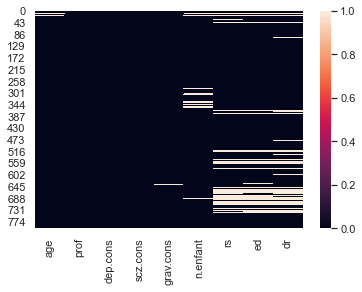

In [23]:
import seaborn as sns
sns.heatmap(data.isna());

**remarque** :<br>
les données on bien été traité et convertir dans le bon type on peut également remarquer l'existance de données manquantes.

Etape 4
--
**i. Traitemet des données manquante**

In [86]:
data['age'] = data['age'].replace(np.nan,data['age'].mean())
data['age'] = [int(c) for c in data['age']]

In [87]:
for c in data.select_dtypes('float64'):
    data[c] = data[c].replace(np.nan,data[c].value_counts().idxmax())
    data[c] = [int(c) for c in data[c]]

In [88]:
data.head()

,age,prof,dep.cons,scz.cons,grav.cons,n.enfant,rs,ed,dr
0,31,autre,0,0,1,2,2,1,1
1,49,NA,0,0,2,7,2,2,1
2,50,intermediaire,0,0,2,2,2,3,2
3,47,ouvrier,0,0,1,0,2,2,2
4,23,sans emploi,1,0,2,1,2,2,2


In [89]:
proc.stat_missing_value()

Statistique données manquante                            colonnes: 9
---------------------------------------------------------------------------
           missing value % of missing value data dtypes  Obs
age                    0               0.0%       int64  799
prof                   0               0.0%      object  799
dep.cons               0               0.0%       int64  799
scz.cons               0               0.0%       int64  799
grav.cons              0               0.0%       int64  799
n.enfant               0               0.0%       int64  799
rs                     0               0.0%       int64  799
ed                     0               0.0%       int64  799
dr                     0               0.0%       int64  799


In [28]:
#sauvegade des données
data.to_csv('clean_dataset.csv',index= False)